In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

# Bar Plots in Matplotlib

Simple Line plots and Histograms are very useful when you have quantitative (continous) data type. Bar plots are useful for plotting categorical data types. 

In [2]:
flights = pd.read_csv("./data/flight_sample.csv")

Let us say you want to find how flights are in the dataset corresponding to each airline. 

You can do this by groupby() and the size() to find the number of airlines in each group.

In [3]:
flights_by_Airline = flights.groupby(["AIRLINE"])
num_flights_airline = flights_by_Airline.size()
num_flights_airline

AIRLINE
AA    1216
AS     311
B6     450
DL    1518
EV    1001
F9     143
HA     121
MQ     510
NK     211
OO    1027
UA     894
US     300
VX     110
WN    2188
dtype: int64

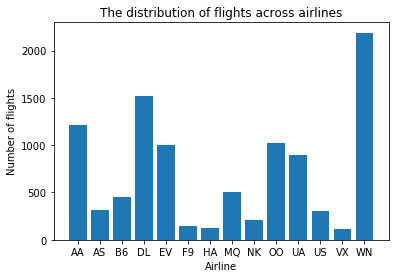

In [8]:
figure, axes = plt.subplots()

#axes.bar(num_flights_airline.index, num_flights_airline)

axes.bar(range(len(num_flights_airline.index)), num_flights_airline)

# This below line will set the ticks at every number
axes.set_xticks( range(len(num_flights_airline.index)))

# This below line will renamed the ticks from numbers to the airlines
axes.set_xticklabels(num_flights_airline.index)

axes.set_xlabel("Airline")
axes.set_ylabel("Number of flights")
axes.set_title("The distribution of flights across airlines")

#### Tight integration with pandas

Instead of writing such a long code. The matplotlib is tightly integrated with pandas. So you can write simple code as below

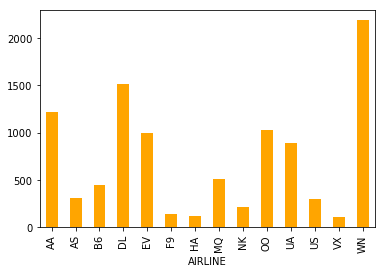

In [9]:
figure, axes = plt.subplots()

num_flights_airline.plot(ax=axes, kind='bar', color='orange')

**Wow** That was easy! 

Plotting bar plots has a lot more features. Look [here](https://matplotlib.org/examples/api/barchart_demo.html) for more examples. 

# Activity

* Group the flights by 'MONTH' and find the number of flights in each month. 

* Plot a *bar* plot with each month on the x-axis and the height of the bar indicating the number of flights
    * Make sure you set the ticks to be from 1 to 12 using axes.set_xticks() method. 
    * Make sure you rename the ticks to be 'Jan', 'Feb', 'Mar', 'Apr',..., 'Dec' using axes.set_xticklabels() method. 

In [10]:
flights_by_month = flights.groupby('MONTH')
num_fli_by_month = flights_by_month.size()
num_fli_by_month

MONTH
1     825
2     765
3     854
4     884
5     823
6     871
7     839
8     857
9     786
10    878
11    816
12    802
dtype: int64

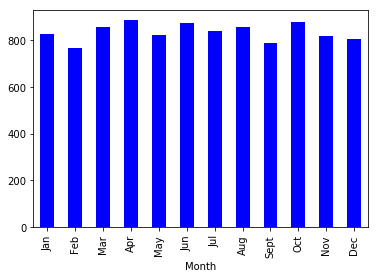

In [13]:
figure, axes = plt.subplots()

num_fli_by_month.plot(ax=axes, kind='bar', color='blue')

axes.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])
axes.set_xlabel("Month")

## Bar plots with multiple bars

In [14]:
flights_month_airline = flights.groupby(["AIRLINE", "MONTH"])
num_flights_month_airline = flights_month_airline.size()
num_flights_month_airline.head()

AIRLINE  MONTH
AA       1        88
         2        74
         3        89
         4        87
         5        80
dtype: int64

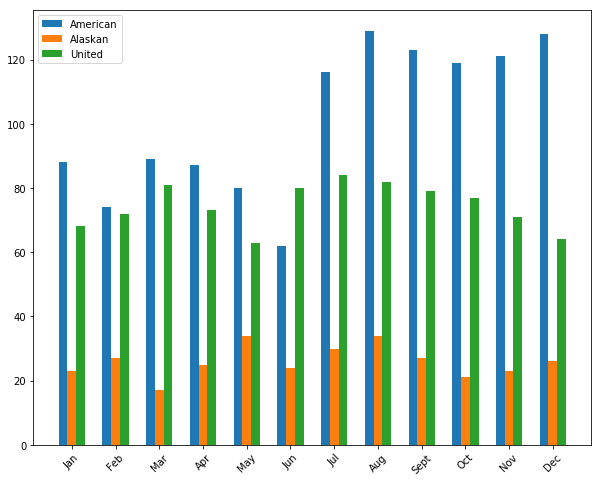

In [18]:
figure, axes = plt.subplots(figsize=(10,8))

width = 0.2

axes.bar(num_flights_month_airline.loc['AA'].index - width, num_flights_month_airline['AA'], 
         width=width, 
         label = "American")
axes.bar(num_flights_month_airline.loc['AS'].index, num_flights_month_airline['AS'], 
         width=width,
         label = "Alaskan")
axes.bar(num_flights_month_airline.loc['UA'].index + width, num_flights_month_airline['UA'], 
         width=width,
         label = "United")

axes.set_xticks(range(1,13))

axes.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'], rotation=45)

axes.legend()

# Activity

* GroupBy 'AIRLINE', 'MONTH' and compute the median distance travelled per airline per month. . 

* Plot multiple bars for median distance travelled by flights of three airlines: Southwest (WN), JetBlue (B6), and Hawaiin (HA) for each of the twelve months

In [19]:
fli_by_airline_month = flights.groupby(['AIRLINE','MONTH'])
med_distance = fli_by_airline_month['DISTANCE'].median()
med_distance.head()

AIRLINE  MONTH
AA       1        1061.0
         2         932.5
         3        1089.0
         4        1045.0
         5        1050.0
Name: DISTANCE, dtype: float64

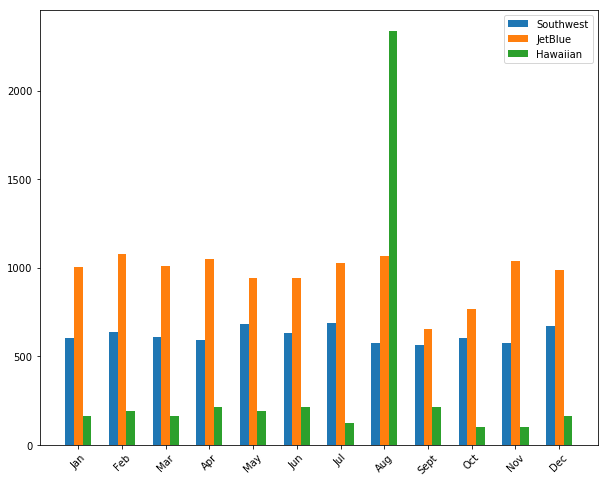

In [20]:
figure, axes = plt.subplots(figsize=(10,8))

width = 0.2

axes.bar(med_distance.loc['WN'].index - width, med_distance['WN'], 
         width=width, 
         label = "Southwest")
axes.bar(med_distance.loc['B6'].index, med_distance['B6'], 
         width=width,
         label = "JetBlue")
axes.bar(med_distance.loc['HA'].index + width, med_distance['HA'], 
         width=width,
         label = "Hawaiian")

axes.set_xticks(range(1,13))

axes.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'], rotation=45)

axes.legend()

# Web Scrapping

Web scrapping is very large concept and involves a deep understanding of how websites are created and managed. You will also need to know some fundamentals of HTML. In this section we will do a very basic foundations of extracting the data from the websites. 

### `pd.read_html()`

Using the pandas package, you can read the tables that are created on the websites. It reads all the tables that are available on the webpage. 

The following example extracts the NBA 2017 draft data set from the [Sports Reference](https://www.basketball-reference.com/draft/NBA_2017.html) website

In [21]:
nba_data_list = pd.read_html("https://www.basketball-reference.com/draft/NBA_2017.html") 
type(nba_data_list)

list

You will notice that after `read_html()` returns a list. There can be multiple tables in a given webpage. The `read_html()` method returns list of tables. In this webpage there is only one table. So you can access the table with the 0th indexed element. 

In [22]:
nba_df = nba_data_list[0]
nba_df

,Unnamed: 0_level_0,Unnamed: 1_level_0,Unnamed: 2_level_0,Round 1,Unnamed: 4_level_0,Totals,Shooting,Per Game,Advanced,Unnamed: 9_level_0,...,Unnamed: 12_level_0,Unnamed: 13_level_0,Unnamed: 14_level_0,Unnamed: 15_level_0,Unnamed: 16_level_0,Unnamed: 17_level_0,Unnamed: 18_level_0,Unnamed: 19_level_0,Unnamed: 20_level_0,Unnamed: 21_level_0
,Rk,Pk,Tm,Player,College,Yrs,G,MP,PTS,TRB,...,3P%,FT%,MP,PTS,TRB,AST,WS,WS/48,BPM,VORP
0,1,1,PHI,Markelle Fultz,University of Washington,1,4,76,24,9,...,NaN,.500,19.0,6.0,2.3,1.8,-0.1,-.082,-8.9,-0.1
1,2,2,LAL,Lonzo Ball,"University of California, Los Angeles",1,11,368,97,69,...,.231,.538,33.5,8.8,6.3,6.8,-0.1,-.016,-1.6,0.0
2,3,3,BOS,Jayson Tatum,Duke University,1,12,357,162,72,...,.529,.833,29.8,13.5,6.0,1.8,1.6,.215,3.7,0.5
3,4,4,PHO,Josh Jackson,University of Kansas,1,12,264,113,38,...,.355,.541,22.0,9.4,3.2,0.8,-0.2,-.039,-5.5,-0.2
4,5,5,SAC,De'Aaron Fox,University of Kentucky,1,10,267,124,35,...,.231,.773,26.7,12.4,3.5,5.3,0.0,-.001,-3.3,-0.1
5,6,6,ORL,Jonathan Isaac,Florida State University,1,10,201,60,43,...,.250,.889,20.1,6.0,4.3,0.9,0.3,.080,-0.1,0.1
6,7,7,MIN,Lauri Markkanen,University of Arizona,1,9,293,142,74,...,.381,.828,32.6,15.8,8.2,1.2,0.8,.131,0.3,0.2
7,8,8,NYK,Frank Ntilikina,NaN,1,9,179,42,17,...,.263,.250,19.9,4.7,1.9,5.0,-0.1,-.023,-3.1,-0.1
8,9,9,DAL,Dennis Smith,North Carolina State University,1,10,283,142,36,...,.289,.586,28.3,14.2,3.6,4.9,-0.4,-.074,-4.3,-0.2


Information on the web pages is not always clean. In this case you might have observed the column names are all multilevel indexes. You can change the column names as indicated on the website by renaming the column names. 

In [23]:
nba_df.columns = ['Rk', 'Pk', 'Tm','Player','College', 'Yrs','G', 'MP', 'PTS','TRB','AST','FG%', 
                    '3P%', 'FT%', 'MP', 'PTS', 'TRB', 'AST', 'WS', 'WS/48', 'BPM', 'VORP']

nba_df.head()

,Rk,Pk,Tm,Player,College,Yrs,G,MP,PTS,TRB,...,3P%,FT%,MP,PTS,TRB,AST,WS,WS/48,BPM,VORP
0,1,1,PHI,Markelle Fultz,University of Washington,1,4,76,24,9,...,NaN,.500,19.0,6.0,2.3,1.8,-0.1,-.082,-8.9,-0.1
1,2,2,LAL,Lonzo Ball,"University of California, Los Angeles",1,11,368,97,69,...,.231,.538,33.5,8.8,6.3,6.8,-0.1,-.016,-1.6,0.0
2,3,3,BOS,Jayson Tatum,Duke University,1,12,357,162,72,...,.529,.833,29.8,13.5,6.0,1.8,1.6,.215,3.7,0.5
3,4,4,PHO,Josh Jackson,University of Kansas,1,12,264,113,38,...,.355,.541,22.0,9.4,3.2,0.8,-0.2,-.039,-5.5,-0.2
4,5,5,SAC,De'Aaron Fox,University of Kentucky,1,10,267,124,35,...,.231,.773,26.7,12.4,3.5,5.3,0.0,-.001,-3.3,-0.1


#### Clean the data

Data downloaded from the webpages, most certainly requires to be cleaned. The following is a simple example of deleting unnnecessary data. 

You will notice that the internet data is **messy**. For example, if you actually see the rows from 28:34, you will see that index 30, 31 had data that is not required. Look at the [website](https://www.basketball-reference.com/draft/NBA_2017.html) the table has a break, so the the DataFrame has unnecessary information. 

In [24]:
nba_df.loc[28:34]

,Rk,Pk,Tm,Player,College,Yrs,G,MP,PTS,TRB,...,3P%,FT%,MP,PTS,TRB,AST,WS,WS/48,BPM,VORP
28,29,29,SAS,Derrick White,University of Colorado,1,4,21,1,6,...,NaN,.250,5.3,0.3,1.5,0.5,0.0,.034,-0.5,0.0
29,30,30,UTA,Josh Hart,Villanova University,1,10,135,27,19,...,.200,.833,13.5,2.7,1.9,0.2,0.1,.048,-2.2,0.0
30,NaN,NaN,NaN,Round 2,NaN,Totals,Shooting,Per Game,Advanced,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,Rk,Pk,Tm,Player,College,Yrs,G,MP,PTS,TRB,...,3P%,FT%,MP,PTS,TRB,AST,WS,WS/48,BPM,VORP
32,31,31,CHO,Frank Jackson,Duke University,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,32,32,PHO,Davon Reed,University of Miami,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,33,33,ORL,Wesley Iwundu,Kansas State University,1,5,25,9,5,...,NaN,.333,5.0,1.8,1.0,0.6,-0.1,-.103,-8.6,0.0


In [25]:
# Drop those two rows with those indices and you are saying inplace=True, to make sure you are not creating a copy. 
nba_df.drop([30,31], axis=0, inplace= True)
nba_df.loc[28:34]

,Rk,Pk,Tm,Player,College,Yrs,G,MP,PTS,TRB,...,3P%,FT%,MP,PTS,TRB,AST,WS,WS/48,BPM,VORP
28,29,29,SAS,Derrick White,University of Colorado,1,4,21,1,6,...,NaN,.250,5.3,0.3,1.5,0.5,0.0,.034,-0.5,0.0
29,30,30,UTA,Josh Hart,Villanova University,1,10,135,27,19,...,.200,.833,13.5,2.7,1.9,0.2,0.1,.048,-2.2,0.0
32,31,31,CHO,Frank Jackson,Duke University,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,32,32,PHO,Davon Reed,University of Miami,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,33,33,ORL,Wesley Iwundu,Kansas State University,1,5,25,9,5,...,NaN,.333,5.0,1.8,1.0,0.6,-0.1,-.103,-8.6,0.0


### Activity

* Use `pd.read_html()` to download the information on all the states from the [wikipedia](https://simple.wikipedia.org/wiki/List_of_U.S._state_capitals) page. 
    * Do the column names appear appropriately? Make sure you set the column names appropriately. 
    * Do you see any redundant rows appearing? Remove them from the DataFrame. 

In [31]:
list_of_tables = pd.read_html("https://simple.wikipedia.org/wiki/List_of_U.S._state_capitals")
states_df = list_of_tables[0]
states_df.head()
states_df.columns = ['State','Abrv','State-hood','Capital','CapitalSince','Area','PopMunic','PopMetro','Rank','Notes']
states_df.head()
states_df.drop([0,1], axis=0, inplace=True)
states_df

,State,Abrv,State-hood,Capital,CapitalSince,Area,PopMunic,PopMetro,Rank,Notes
2,Alabama,AL,1819,Montgomery,1846,155.4,205764,374536,2.0,Birmingham is the state's largest city. And is...
3,Alaska,AK,1959,Juneau,1906,2716.7,31275,NaN,3.0,Largest capital by municipal land area. Anchor...
4,Arizona,AZ,1912,Phoenix,1889,474.9,1445632,4192887,1.0,Most populous U.S. state capital and the only ...
5,Arkansas,AR,1836,Little Rock,1821,116.2,193524,877091,1.0,NaN
6,California,CA,1850,Sacramento,1854,97.2,466488,2527123,6.0,Supreme Court of California is headquartered i...
7,Colorado,CO,1876,Denver,1867,153.4,600158,2552195,1.0,Denver was called Denver City until 1882.
8,Connecticut,CT,1788,Hartford,1875,17.3,124775,1212381,3.0,"Bridgeport is the state's largest city, Hartfo..."
9,Delaware,DE,1787,Dover,1777,22.4,36047,162310,2.0,Longest-serving capital in terms of statehood....
10,Florida,FL,1845,Tallahassee,1824,95.7,181412,367413,7.0,Jacksonville is the largest city. Miami is the...
11,Georgia,GA,1788,Atlanta,1868,131.7,420003,5268860,1.0,State capital with the most populous metro are...


In [32]:
states_df.shape

(50, 10)

### Activity

* Download the top 250 movies from [IMDB](http://www.imdb.com/chart/top?ref_=nv_wl_img_3) list 

* Clean the data and remove unnecessary rows and columns

In [33]:
pd.read_html("http://www.imdb.com/chart/top?ref_=nv_wl_img_3")[0]

,Unnamed: 0,Rank & Title,IMDb Rating,Your Rating,Unnamed: 4
0,NaN,1. The Shawshank Redemption (1994),9.2,12345678910 NOT YET RELEASED Seen,NaN
1,NaN,2. The Godfather (1972),9.2,12345678910 NOT YET RELEASED Seen,NaN
2,NaN,3. The Godfather: Part II (1974),9.0,12345678910 NOT YET RELEASED Seen,NaN
3,NaN,4. The Dark Knight (2008),9.0,12345678910 NOT YET RELEASED Seen,NaN
4,NaN,5. 12 Angry Men (1957),8.9,12345678910 NOT YET RELEASED Seen,NaN
5,NaN,6. Schindler's List (1993),8.9,12345678910 NOT YET RELEASED Seen,NaN
6,NaN,7. Pulp Fiction (1994),8.9,12345678910 NOT YET RELEASED Seen,NaN
7,NaN,8. The Lord of the Rings: The Return of the K...,8.9,12345678910 NOT YET RELEASED Seen,NaN
8,NaN,"9. The Good, the Bad and the Ugly (1966)",8.8,12345678910 NOT YET RELEASED Seen,NaN
9,NaN,10. Fight Club (1999),8.8,12345678910 NOT YET RELEASED Seen,NaN


# Packages for webscrapping 

* urllib
* requests
* **BeautifulSoup**
* mechanize

This will require some fundamentals on HTML, the language used to display the webpages on the browser. 

In [ ]:
import urllib
import requests
from bs4 import BeautifulSoup

In [ ]:
req = requests.get("https://simple.wikipedia.org/wiki/List_of_U.S._state_capitals")
page = req.text

page_soup = BeautifulSoup(page, 'html.parser')


You can print the actual webpage and its contents. 

**Warning**: The contents of a webpage are messy and may not be obvious for the first time. However, if you want to scrape any website, you will have to be patient and look through the contents to extract the information. 

In [ ]:
print(page_soup.prettify())

In [ ]:
page_soup.title

In [ ]:
page_soup.title.string

### Searching in the webpage

You can programmatically search through a webpage to find the tables that are available on the webpage. You can do that by using **`find_all()`** method. 

In [ ]:
states_table = page_soup.find_all("table")
states_table

# Favorite Song Playing Example

We use this every day in the class. It is based on [stackoverflow](https://stackoverflow.com/questions/29069444/returning-the-urls-from-a-youtube-search) example. Let us parse through the code. 

The following are some of the packages required. 

In [35]:
import urllib
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import random
from IPython.display import Markdown, display, HTML

In [36]:
textToSearch = "David Guetta titanium"

query = urllib.parse.quote(textToSearch)

url = "https://www.youtube.com/results?search_query=" + query

response = urlopen(url)
html = response.read()
soup = BeautifulSoup(html, 'lxml')


In [37]:
# In the following we are just picking up the first link that shows up. 
soup.findAll(attrs={'class':'yt-uix-tile-link'})[0]

<a aria-describedby="description-id-371339" class="yt-uix-tile-link yt-ui-ellipsis yt-ui-ellipsis-2 yt-uix-sessionlink spf-link " data-sessionlink="itct=CFgQ3DAYACITCMOMrOy4stcCFQ8ETgodTggG0Sj0JFIVRGF2aWQgR3VldHRhIHRpdGFuaXVt" dir="ltr" href="/watch?v=JRfuAukYTKg" rel="spf-prefetch" title="David Guetta - Titanium ft. Sia (Official Video)">David Guetta - Titanium ft. Sia (Official Video)</a>

In [38]:
# Now we are picking up the random code that is used for every youtube video
soup.findAll(attrs={'class':'yt-uix-tile-link'})[0]['href']

'/watch?v=JRfuAukYTKg'

In [39]:
# Now we are justing picking up the randome code without the '/watch?v=' in the string so we are getting 
# from the 9th index to the rest of it. 
soup.findAll(attrs={'class':'yt-uix-tile-link'})[0]['href'][9:]

'JRfuAukYTKg'

In [40]:
songLink = 'https://www.youtube.com/embed/'+soup.findAll(attrs={'class':'yt-uix-tile-link'})[0]['href'][9:]

# We are embedding the video we searched into the following webpage using HTML

HTML('<iframe width="560" height="315" src='+songLink+' frameborder="0" allowfullscreen></iframe>')

# WebScrapping through Application Programming Interface (API)

There are a lot of APIs available for each of the website. You can use these APIs to scrape websites like Twitter, Google Trends, etc. 

In this section, we will use a simple API provided by NASA, [here](http://open-notify.org/), to retrieve data about the International Space Station (ISS). 

Some of the content presented here is based on [dataquest](https://www.dataquest.io/blog/python-api-tutorial/). 

#### Current ISS position

In [43]:
import requests

response = requests.get("http://api.open-notify.org/iss-now.json")

print(response.status_code)

200


There are various status codes that you will get when you request a website. [This](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes) describes more detailed description. 

In [49]:
response = requests.get("http://api.open-notify.org/iss-now.json")
pd.read_json(response.content)

,iss_position,message,timestamp
latitude,5.1239,success,2017-11-09 21:38:06
longitude,-165.9286,success,2017-11-09 21:38:06


#### Current Number of People In Space

In [50]:
response = requests.get("http://api.open-notify.org/astros.json")
pd.read_json(response.content)

,message,number,people
0,success,6,"{'name': 'Sergey Ryazanskiy', 'craft': 'ISS'}"
1,success,6,"{'name': 'Randy Bresnik', 'craft': 'ISS'}"
2,success,6,"{'name': 'Paolo Nespoli', 'craft': 'ISS'}"
3,success,6,"{'name': 'Alexander Misurkin', 'craft': 'ISS'}"
4,success,6,"{'name': 'Mark Vande Hei', 'craft': 'ISS'}"
5,success,6,"{'name': 'Joe Acaba', 'craft': 'ISS'}"


# Exception Handling

Sometimes the interpreter will generate an error that will interrupt the execution of your program.  These are called exceptions and can be handled programmatically.

This part of the content if from [Chapter 10](https://automatetheboringstuff.com/chapter10/) of the your ABSP textbook. 

## `try` and `except` statements

In [51]:
10/0

ZeroDivisionError: division by zero

In [53]:
a = int(input("Number: "))

Number: Sriram


ValueError: invalid literal for int() with base 10: 'Sriram'

In [55]:
try:
    a = int(input("Number 1: "))
    b = int(input("Number 2: "))
    print(a/b)
except ValueError:
    print("Whoa, that's not an integer")
except ZeroDivisionError:
    print("Whoa, you can't divide by zero")

Number 1: 34
Number 2: 0
Whoa, you can't divide by zero


### `raise` statement

In [57]:
try:
    a = int(input("Number 1: "))
    if a<0:
        raise ValueError("Entered a Negative")
except ValueError:
    print("Whoa, that's not an integer")
    raise

Number 1: -3
Whoa, that's not an integer


ValueError: Entered a Negative

### `assert` statement

An assertion is a sanity check to make sure your code isn’t doing something obviously wrong. These sanity checks are performed by `assert` statements. If the sanity check fails, then an `AssertionError` exception is raised.

In [59]:
instructorName = 'Sriram'

assert instructorName == 'Sriram', "Wow! The instructor has to be Sriram!"